# How to customize the charts

In [24]:
# 1) import libraries & dataset
from datasets import load_dataset
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# 2) format job_posted date in datetime (it was string)
df.job_posted_date = pd.to_datetime(df.job_posted_date)

# 3) add column job posted month to convert job posted datetime
df['job_posted_month'] = df.job_posted_date.dt.month

# 4) convert 'job_skills' into list
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


### Customize line chart

<Axes: title={'center': 'Top 5 Trending Skills'}>

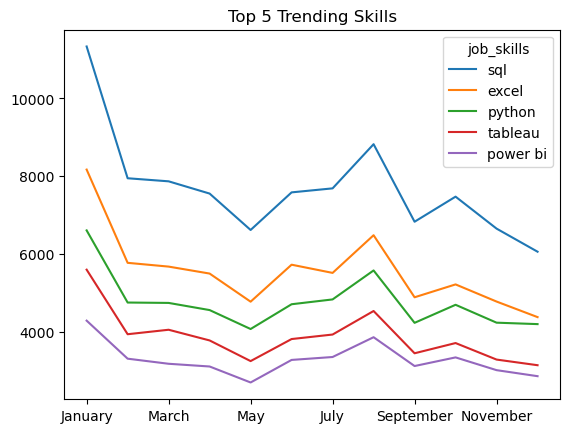

In [3]:
#chart from trending skills exercise
df_da = df[df['job_title_short'] == 'Data Analyst'].copy()
df_da_explode = df_da.explode('job_skills')
df_pivot = df_da_explode.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)
df_pivot.loc['Total'] = df_pivot.sum()
df_pivot = df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).index]
df_pivot = df_pivot.drop('Total')
df_pivot = df_pivot.reset_index()
df_pivot['job_posted_month'] = df_pivot['job_posted_month'].apply(
    lambda x: pd.to_datetime(x, format='%m').strftime('%B')
)
df_pivot = df_pivot.set_index('job_posted_month')
df_pivot.iloc[:,:5].plot(kind='line', xlabel='', title='Top 5 Trending Skills')

<Axes: title={'center': 'Top 5 Trending Skills'}>

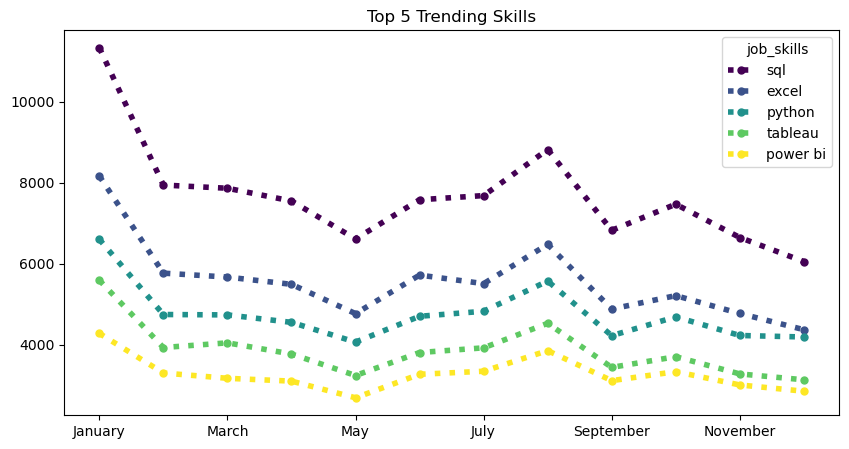

In [4]:
df_pivot.iloc[:,:5].plot(
    kind='line', 
    linewidth=4,
    linestyle=':', #options: '-', '--', '-.', ':'
    colormap='viridis',
    xlabel='', 
    title='Top 5 Trending Skills',
    marker='o', #options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', ...
    markersize=5,
    figsize=(10,5)
)

### Customize Scatter Plot

In [5]:
df = df[df['job_title_short'] == 'Data Analyst'] # filter only data analysts
df_exploded = df.explode('job_skills').copy() # explode the skill list
df_skills = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'), # tuple with the grouping column and the aggregation function
    median_salary=('salary_year_avg', 'median') # tuple with the grouping column and the aggregation function
)
skills_stat = df_skills.sort_values(by='skill_count', ascending=False).head(20) # sorting by count + top 20
skills_stat

,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


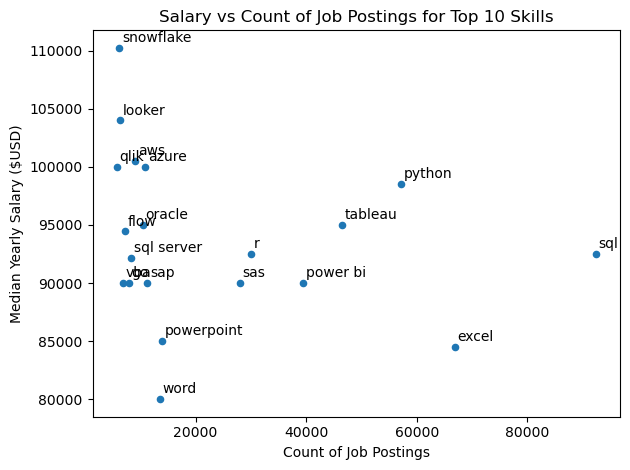

In [6]:
skills_stat.plot(
    kind='scatter',
    x='skill_count',
    y='median_salary',
    xlabel='Count of Job Postings', 
    ylabel='Median Yearly Salary ($USD)',
    title='Salary vs Count of Job Postings for Top 10 Skills', 
)
#using the plt.text function add lables --> workaround till seaborn
for i, txt in enumerate (skills_stat.index): # i is the index and txt is the column
    plt.text(skills_stat['skill_count'].iloc[i]+500, skills_stat['median_salary'].iloc[i]+500, txt) # loop to assign coordinates based on the df data

plt.tight_layout()
plt.show()

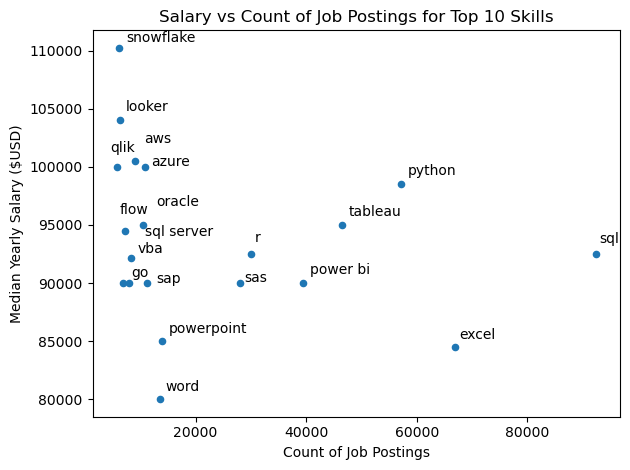

In [8]:
from adjustText import adjust_text

skills_stat.plot(
    kind='scatter',
    x='skill_count',
    y='median_salary',
    xlabel='Count of Job Postings', 
    ylabel='Median Yearly Salary ($USD)',
    title='Salary vs Count of Job Postings for Top 10 Skills', 
)
#adjust text
texts=[] #empty list to be filled with the loop
for i, txt in enumerate (skills_stat.index): # i is the index and txt is the column
    texts.append(plt.text(skills_stat['skill_count'].iloc[i]+500, skills_stat['median_salary'].iloc[i]+500, txt)) # loop to append the empty list

adjust_text(texts)

plt.tight_layout()
plt.show()

Better visualization, but still lacking a clear connector between label and coordinate

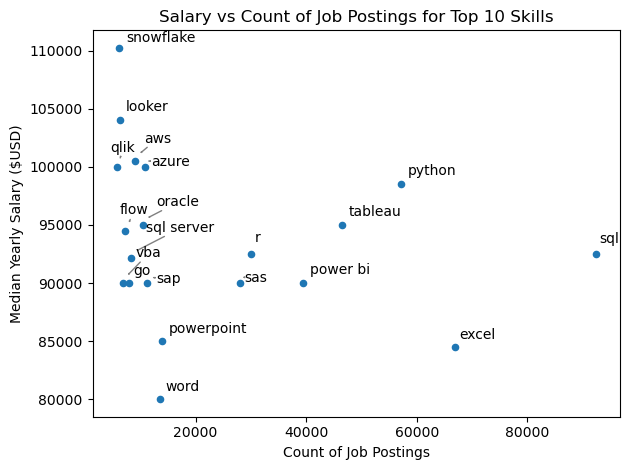

In [21]:
from adjustText import adjust_text

skills_stat.plot(
    kind='scatter',
    x='skill_count',
    y='median_salary',
    xlabel='Count of Job Postings', 
    ylabel='Median Yearly Salary ($USD)',
    title='Salary vs Count of Job Postings for Top 10 Skills', 
)
#adjust text
texts=[] #empty list to be filled with the loop
for i, txt in enumerate (skills_stat.index): # i is the index and txt is the column
    texts.append(plt.text(skills_stat['skill_count'].iloc[i]+500, skills_stat['median_salary'].iloc[i]+500, txt)) # loop to append the empty list

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1)) #

plt.tight_layout()
plt.show()

Now the labels are adjusted, but still we want to customize the y axis, setting it in currency and K format

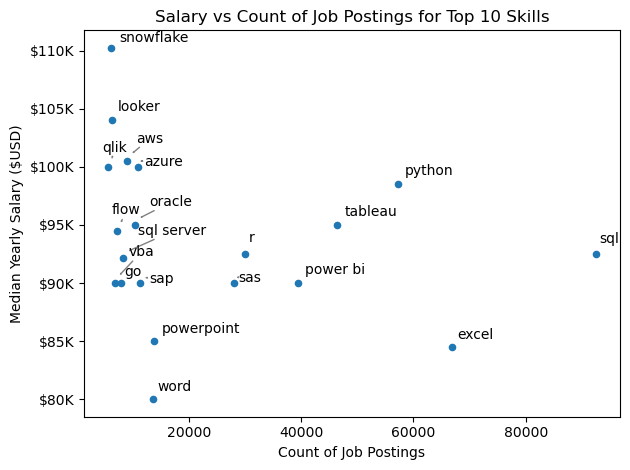

In [22]:
from adjustText import adjust_text


skills_stat.plot(
    kind='scatter',
    x='skill_count',
    y='median_salary',
    xlabel='Count of Job Postings', 
    ylabel='Median Yearly Salary ($USD)',
    title='Salary vs Count of Job Postings for Top 10 Skills', 
)
#adjust text
texts=[] #empty list to be filled with the loop
for i, txt in enumerate (skills_stat.index): # i is the index and txt is the column
    texts.append(plt.text(skills_stat['skill_count'].iloc[i]+500, skills_stat['median_salary'].iloc[i]+500, txt)) # loop to append the empty list

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1)) #adjusting labels + adding the connector line 

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # pos is the index of the ax, F string to format the axis

plt.tight_layout()
plt.show()

### Exercises

🟩 Job Postings Trend for Cloud Engineers (2.16.1) - Problem
Matplotlib Advanced Customization
Problem Statement:

Create a line plot showing the trend of job postings over the months for Cloud Engineer job postings:

- Create a new DataFrame called df_ce that filters only job postings that are 'Cloud Engineer'
- Customize the plot by setting the line style to dotted, the line color to purple, and the marker style to 'o'.
- Add a title 'Job Postings Trend for Cloud Engineers' and label the y-axis as 'Count of Job Postings'.

Hint:

Use the DataFrames plot() method to create the line plot and customize the line style, color, and marker style using the linestyle, color, and marker parameters.

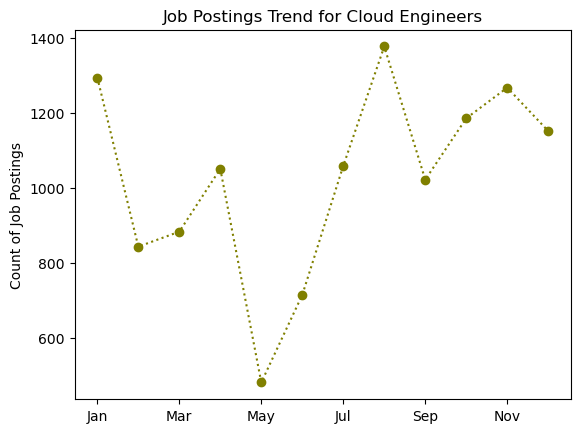

In [53]:
df_cloud_eng = df[df['job_title_short'] == 'Cloud Engineer'].copy()
df_cloud_eng['month'] = df_cloud_eng['job_posted_month'].apply(lambda month: datetime(2024, month, 1).strftime('%b'))
trend = df_cloud_eng.groupby(['job_posted_month','month']).size().reset_index()
trend.set_index('job_posted_month', drop=True, inplace=True)

trend.plot(
    kind='line',
    title='Job Postings Trend for Cloud Engineers',
    x='month',
    ylabel='Count of Job Postings', 
    xlabel='',
    marker='o',
    color='olive',
    linestyle=':',
    legend=''
)

plt.show()

🟨 Customize Bar Chart (2.16.2) - Problem
Matplotlib Advanced Customization
Problem Statement:

Create a bar chart showing the top 5 job companies hiring for Senior Data Analyst roles:

- Create a DataFrame called SDA_df. 
- Customize the plot by setting the bar colors to 5 different colors with the variable colors.
- Add a grid to the y-axis only and making it dashes.
- Rotate the x-axis labels by 45 degrees.
- Label the y-axis as 'Number of Job Postings' and set the title to 'Top 5 Companies hiring Senior Data Analysts by Number of Postings'; Make the font size 14.


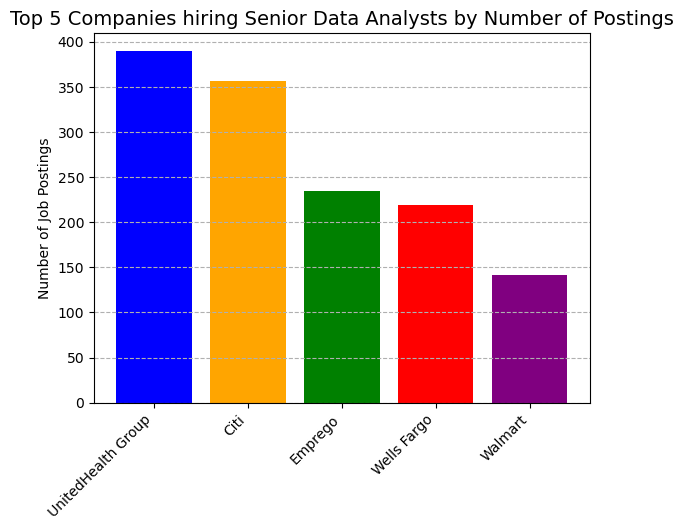

In [81]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Filter for Senior Data Analyst roles
SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()

# Get the top 5 companies by number of postings
location_counts = SDA_df['company_name'].value_counts().head(5)

# Custom colors
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plot the bar chart
plt.bar(location_counts.index, location_counts.values, color=colors)
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

Another version

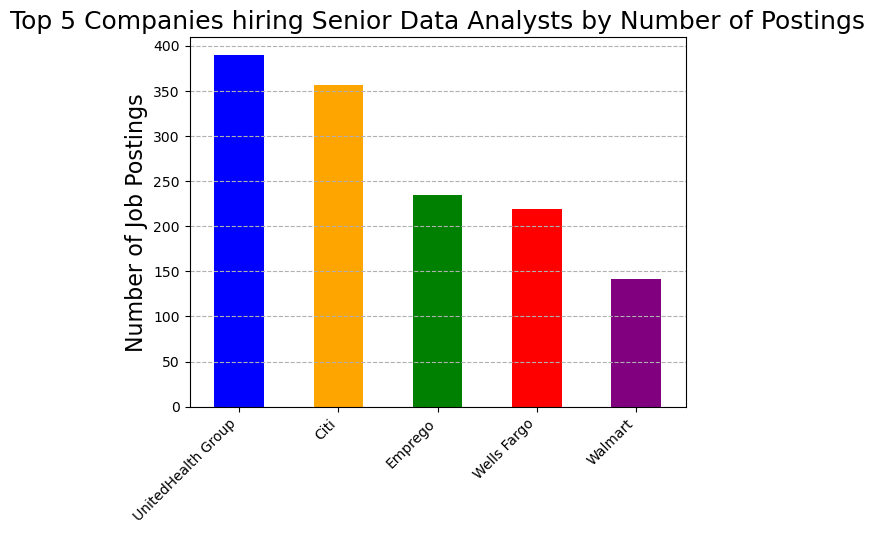

In [83]:
import matplotlib.pyplot as plt

colors = ['blue', 'orange', 'green', 'red', 'purple']

sda_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()
sda_df = sda_df.groupby('company_name').size().sort_values(ascending=False).head(5)

ax = sda_df.plot(
    kind='bar',
    ylabel='Number of Job Postings',
    xlabel='',
    title='Top 5 Companies hiring Senior Data Analysts by Number of Postings',
    fontsize=10,  # This sets the font size for the ticks
    color=colors,
)

# Increase font size for the title and ylabel
ax.set_title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=18)  # Larger title font
ax.set_ylabel('Number of Job Postings', fontsize=16)  # Larger ylabel font

# Add grid only to the y-axis with dashed lines
ax.grid(axis='y', linestyle='--')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()
